_**Import PKGs**_

In [1]:
import gmso 
import random
import numpy as np
import mbuild as mb
from gmso.core.forcefield import ForceField
from gmso.external import from_mbuild
from gmso.parameterization import apply
from mbuild.lib.recipes.polymer import Polymer
from rdkit.Chem import Draw
from IPython.display import display

_**Build the Structure of Repeat Unit**_

In [2]:
comp = mb.load('[H]CCOC(=O)CCCCC(=O)OCCOC(=O)c1ccc(C(=O)O[H])cc1', smiles=True) 
comp.visualize()


d:\programdata\anaconda3\envs\mbuild_env\Lib\site-packages\mbuild\compound.py:546: UserWarning: Some particle of <Compound 48 particles, 48 bonds, non-periodic, id: 2546459424288> does not have a charge.They will not be accounted for during this calculation.
  warn(


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [4]:
comp.save('comp.pdb')

d:\programdata\anaconda3\envs\mbuild_env\Lib\site-packages\mbuild\compound.py:546: UserWarning: Some particle of <Compound 48 particles, 48 bonds, non-periodic, id: 2546458799584> does not have a charge.They will not be accounted for during this calculation.
  warn(


_**Apply the Force Field to the Repeat Unit Mol**_

In [5]:
gmso_oplsaa = ForceField("oplsaa.xml")
gmso_topology = from_mbuild(comp)
apply(top=gmso_topology, forcefields=gmso_oplsaa, identify_connections=True) 

d:\programdata\anaconda3\envs\mbuild_env\Lib\site-packages\gmso\core\atom_type.py:236: UserWarning: Masses are assumed to be in units of g/mol
  warnings.warn(UNIT_WARNING_STRING.format("Masses", "g/mol"))
d:\programdata\anaconda3\envs\mbuild_env\Lib\site-packages\gmso\core\atom_type.py:248: UserWarning: Charges are assumed to be in units of elementary charge
  warnings.warn(UNIT_WARNING_STRING.format("Charges", "elementary charge"))
d:\programdata\anaconda3\envs\mbuild_env\Lib\site-packages\gmso\core\forcefield.py:362: UserWarning: BondType between atoms opls_135 and opls_490 is missing from the ForceField
  warnings.warn(msg)
d:\programdata\anaconda3\envs\mbuild_env\Lib\site-packages\gmso\core\forcefield.py:362: UserWarning: BondType between atoms opls_135 and opls_140 is missing from the ForceField
  warnings.warn(msg)
d:\programdata\anaconda3\envs\mbuild_env\Lib\site-packages\gmso\core\forcefield.py:362: UserWarning: BondType between atoms opls_490 and opls_467 is missing from the 

ParameterizationError: No parameters found for connection <Angle Angle, id: 2546552023760> , group: angle_type, identifiers: [['opls_467', 'opls_465', 'opls_145'], ['OS', 'C_2', 'CA']] in the Forcefield.

_**Check the Order of Atoms**_

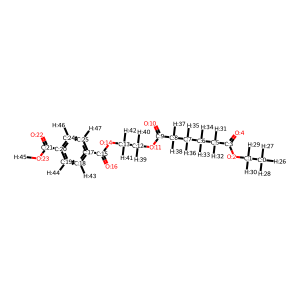

In [6]:
comp_rdkmol=comp.to_rdkit()
img=Draw.MolToImage(comp_rdkmol)
display(img)

_**Build the Structure of Single chain**_

In [ ]:
chain = Polymer()

chain.add_monomer(compound=comp,
                  indices=[26, 45],
                  separation=.154,
                  replace=True)
chain.add_end_groups(mb.load('[H]CCOC(=O)CCCCC(=O)OCCOC(=O)c1ccc(C(=O)O[H])cc1',smiles=True), 
                     index=26,
                     separation=0.154, label="head", duplicate=False)

chain.add_end_groups(mb.load('[H]CCOC(=O)CCCCC(=O)OCCOC(=O)c1ccc(C(=O)O[H])cc1',smiles=True), 
                     index=45,
                     separation=0.154, label="tail", duplicate=False)
chain.build(n=20, sequence='A')
chain.visualize(show_ports=True)


In [ ]:
chain.save('chain.pdb')

_**Apply the Force Field to the Single Chain**_

In [ ]:
gmso_oplsaa = ForceField("oplsaa.xml")
gmso_topology = from_mbuild(chain)
apply(top=gmso_topology, forcefields=gmso_oplsaa, identify_connections=True) 

_**Build the Structure of System Containing Several Chains**_

In [ ]:
# the pattern we generate puts points in the xy-plane, so we'll rotate the polymer
# so that it is oriented normal to the xy-plane
chain.rotate(np.pi/2, [1, 0, 0])

# define a compound to hold all the polymers
system = mb.Compound()

# create a pattern of points to fill a disk
# patterns are generated between 0 and 1,
# and thus need to be scaled to provide appropriate spacing
pattern_disk = mb.DiskPattern(50)
pattern_disk.scale(5)

# now clone the polymer and move it to the points in the pattern
for pos in pattern_disk:
    current_polymer = mb.clone(chain)
    current_polymer.translate(pos)
    system.add(current_polymer)

system.visualize()


In [ ]:
system.save('system.pdb')

_**Apply the Force Field to the System**_

In [ ]:
gmso_oplsaa = ForceField("oplsaa.xml")
gmso_topology = from_mbuild(system)
apply(top=gmso_topology, forcefields=gmso_oplsaa, identify_connections=True) 